In [1]:
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

path = "D:\\Folder F\\phamtuananh@23020010\\UET.iSEML\\Reliable Black-Box Prompt Optimization\\src\\analysis\\gemma-3-4b-it\\dolly_eval\\deepseek-chat\\lose_pairwise_results_ori_rbpo_classified.json"

# ====== LOAD DATA ======
with open(path, "r", encoding="utf-8") as f:
    data = json.load(f)
print(f"Loaded {len(data)} records")

Loaded 200 records


In [2]:
import os

def convert_analysis_path_to_figure(path: str,prefix, suffix: str = "ori_rbpo") -> str:
    norm_path = os.path.normpath(path)
    parts = norm_path.split(os.sep)

    try:
        analysis_idx = parts.index("analysis")

        model = parts[analysis_idx + 1].split("-")[0]
        eval_name = parts[analysis_idx + 2].split("-")[0]
        judge = parts[analysis_idx + 3].split("-")[0]

    except (ValueError, IndexError):
        raise ValueError("Path không đúng cấu trúc src/analysis/...")

    return os.path.join(
        # "src",
        "figure",
        f"{model}_{eval_name}_{judge}_{prefix}_{suffix}"
    )
    
figure_path = convert_analysis_path_to_figure(path, prefix="test", suffix="ori_rbpo")
print(figure_path)

figure\gemma_dolly_eval_deepseek_test_ori_rbpo


Global max count: 78


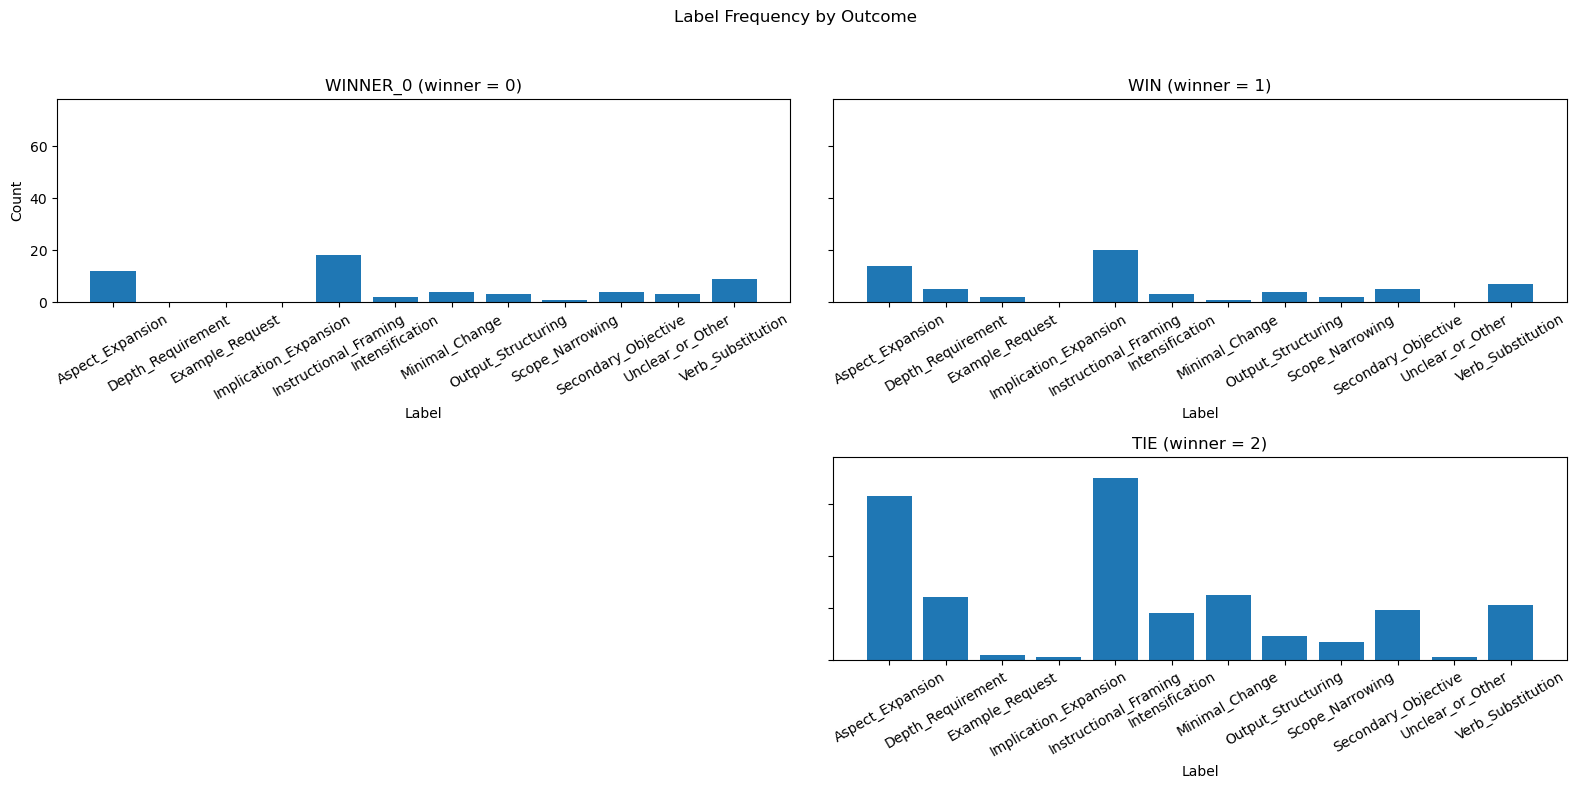

In [3]:
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

label_win_counter = defaultdict(lambda: Counter())

for item in data:
    w = item["winner"]
    for lb in item["classification"]["labels"]:
        label_win_counter[lb][w] += 1

labels = list(label_win_counter.keys())
labels = sorted(label_win_counter.keys())

winner_values = sorted({item["winner"] for item in data})  # ví dụ: [0, 1, 2]

# ====== TÍNH GLOBAL MAX ======
global_max = 0
for w in winner_values:
    counts = [label_win_counter[lb].get(w, 0) for lb in labels]
    if counts:
        global_max = max(global_max, max(counts))

global_max = int(global_max * 1.1) + 1  # thêm đệm

print("Global max count:", global_max)

winner_name_map = {
    # 0: "LOSS",
    1: "WIN",
    2: "TIE"
}

# ====== TẠO LAYOUT 2x2 ======
fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharey=True)


# Tắt subplot trống (ô [1,0])
axes[1, 0].axis("off")

# Map winner -> vị trí subplot
winner_position = {
    0: (0, 0),  # LOSS
    1: (0, 1),  # WIN
    2: (1, 1)   # TIE (giữa hàng 2, lệch phải)
}

for w, (r, c) in winner_position.items():
    if w not in winner_values:
        continue

    ax = axes[r, c]
    counts = [label_win_counter[lb].get(w, 0) for lb in labels]
    name = winner_name_map.get(w, f"WINNER_{w}")

    ax.bar(labels, counts)
    ax.set_title(f"{name} (winner = {w})")
    ax.set_xlabel("Label")
    ax.set_ylim(0, global_max)
    ax.tick_params(axis="x", rotation=30)

# Nhãn trục Y chung
axes[0, 0].set_ylabel("Count")

fig.suptitle("Label Frequency by Outcome", fontsize=12)
fig.tight_layout(rect=[0, 0, 1, 0.95])

# ====== LƯU ẢNH ======
figure_path = convert_analysis_path_to_figure(path, prefix="bar",suffix="ori_rbpo")
plt.savefig(figure_path, dpi=300, bbox_inches="tight")

plt.show()


In [4]:
# from collections import Counter, defaultdict
# import matplotlib.pyplot as plt

# label_win_counter = defaultdict(lambda: Counter())

# for item in data:
#     w = item["winner"]
#     for lb in item["classification"]["labels"]:
#         label_win_counter[lb][w] += 1

# # ====== SORT LABELS ======
# labels = sorted(label_win_counter.keys())

# # ====== CHỈ LẤY WINNER = 2 ======
# target_winner = 2
# counts = [label_win_counter[lb].get(target_winner, 0) for lb in labels]

# # ====== PLOT Ở GIỮA ======
# plt.figure(figsize=(12, 6))

# plt.bar(labels, counts)
# plt.title("Label Frequency (TIE only – winner = 2)")
# plt.xlabel("Label")
# plt.ylabel("Count")
# plt.ylim(0, global_max)
# plt.xticks(rotation=30, ha="right")

# plt.tight_layout()
# plt.show()

In [5]:
# from collections import Counter, defaultdict
# from itertools import combinations
# import matplotlib.pyplot as plt

# # ---- Explode labels ----
# rows = []
# for item in data:
#     w = item["winner"]
#     labels = item["classification"]["labels"]
#     for lb in labels:
#         rows.append((w, lb))

# # rows: list of (winner, label)
# # ---- Đếm đồng xuất hiện ----
# co_counter = Counter()

# for item in data:
#     if item["winner"] == 0:
#         lbs = sorted(item["classification"]["labels"])
#         for a, b in combinations(lbs, 2):
#             co_counter[(a, b)] += 1

# all_labels = sorted({lb for pair in co_counter for lb in pair})

# # ---- Tạo ma trận ----
# matrix = [[0 for _ in all_labels] for _ in all_labels]

# idx = {lb: i for i, lb in enumerate(all_labels)}

# for (a, b), cnt in co_counter.items():
#     i, j = idx[a], idx[b]
#     matrix[i][j] = cnt
#     matrix[j][i] = cnt   # đối xứng

# # ---- Plot ----

# label_counter = defaultdict(lambda: Counter())

# for w, lb in rows:
#     label_counter[lb][w] += 1

# labels = sorted(label_counter.keys())

# win0 = [label_counter[lb].get(0, 0) for lb in labels]
# win1 = [label_counter[lb].get(1, 0) for lb in labels]

# x = range(len(labels))
# bar_width = 0.4

# plt.figure(figsize=(10, 5))
# plt.bar(x, win0, width=bar_width, label="Winner = 0")
# plt.bar([i + bar_width for i in x], win1, width=bar_width, label="Winner = 1")

# plt.xticks([i + bar_width / 2 for i in x], labels, rotation=30, ha="right")
# plt.title("Label Comparison: Winner 0 vs Winner 1")
# plt.xlabel("Label")
# plt.ylabel("Count")
# plt.legend()
# plt.tight_layout()
# plt.show()



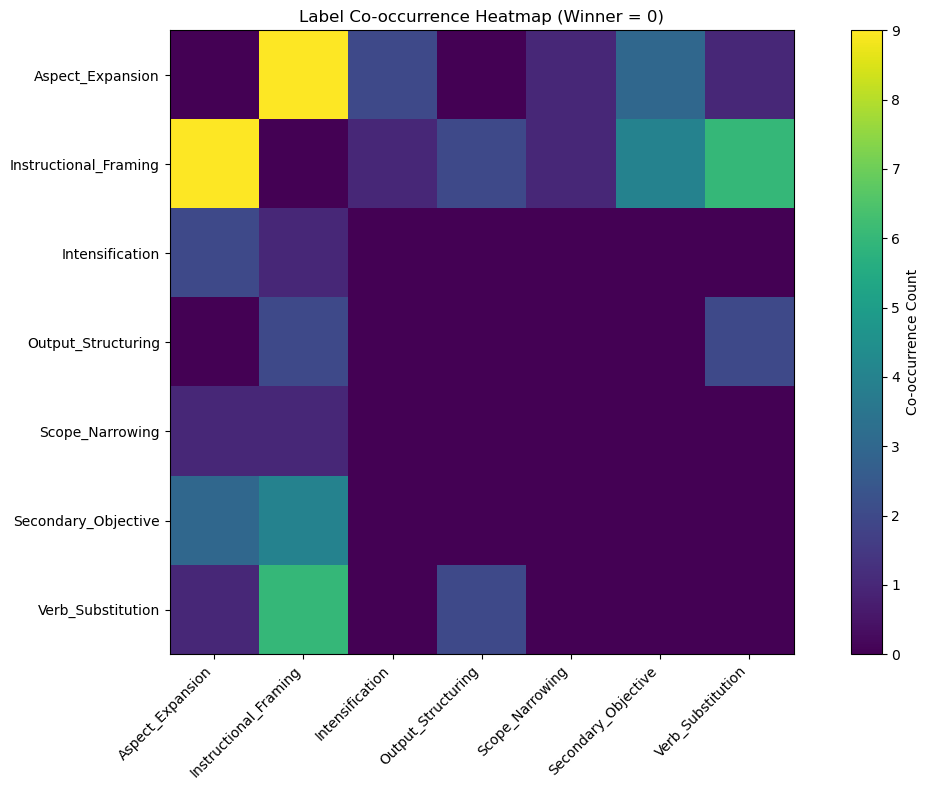

In [6]:
from collections import Counter, defaultdict
from itertools import combinations
import matplotlib.pyplot as plt

# ---- Explode labels ----
rows = []
for item in data:
    w = item["winner"]
    labels = item["classification"]["labels"]
    for lb in labels:
        rows.append((w, lb))

# rows: list of (winner, label)
# ---- Đếm đồng xuất hiện ----
co_counter = Counter()

for item in data:
    if item["winner"] == 0:
        lbs = sorted(item["classification"]["labels"])
        for a, b in combinations(lbs, 2):
            co_counter[(a, b)] += 1

all_labels = sorted({lb for pair in co_counter for lb in pair})

# ---- Tạo ma trận ----
matrix = [[0 for _ in all_labels] for _ in all_labels]

idx = {lb: i for i, lb in enumerate(all_labels)}

for (a, b), cnt in co_counter.items():
    i, j = idx[a], idx[b]
    matrix[i][j] = cnt
    matrix[j][i] = cnt   # đối xứng

# ---- Plot ----
plt.figure(figsize=(12, 8))
plt.imshow(matrix)
plt.colorbar(label="Co-occurrence Count")
plt.xticks(range(len(all_labels)), all_labels, rotation=45, ha="right")
plt.yticks(range(len(all_labels)), all_labels)
plt.title("Label Co-occurrence Heatmap (Winner = 0)")
plt.tight_layout()

figure_path = convert_analysis_path_to_figure(path, prefix="heatmap_0",suffix="ori_rbpo")
plt.savefig(figure_path, dpi=300, bbox_inches="tight")
plt.show()



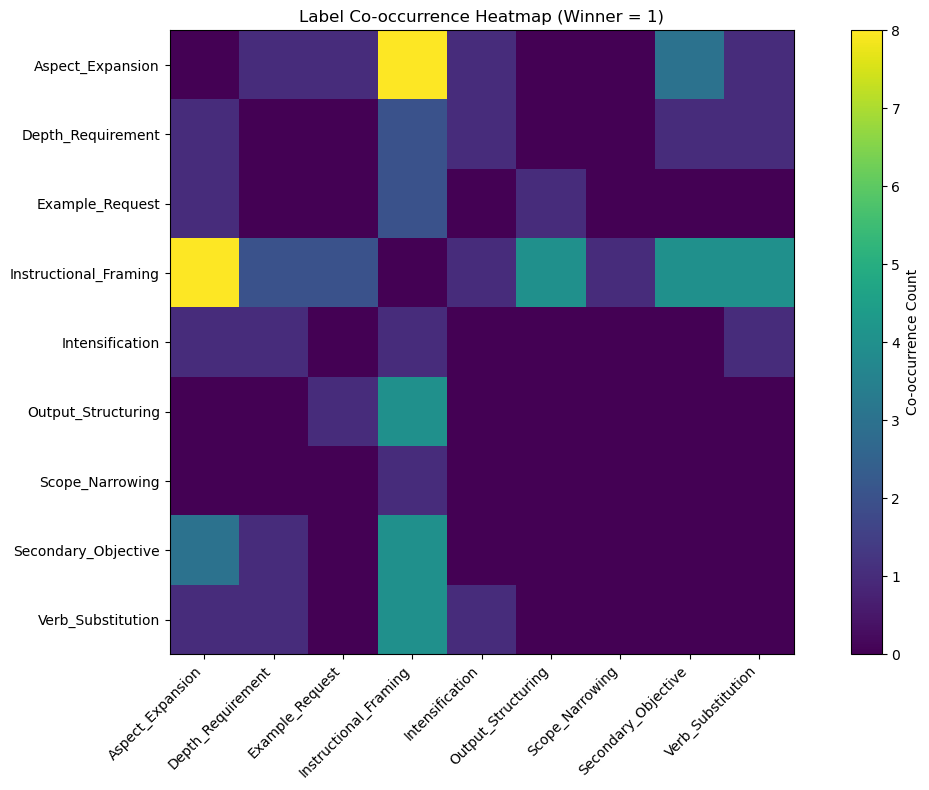

In [7]:
from collections import Counter, defaultdict
from itertools import combinations
import matplotlib.pyplot as plt

# ---- Explode labels ----
rows = []
for item in data:
    w = item["winner"]
    labels = item["classification"]["labels"]
    for lb in labels:
        rows.append((w, lb))

# rows: list of (winner, label)
# ---- Đếm đồng xuất hiện ----
co_counter = Counter()

for item in data:
    if item["winner"] == 1:
        lbs = sorted(item["classification"]["labels"])
        for a, b in combinations(lbs, 2):
            co_counter[(a, b)] += 1

all_labels = sorted({lb for pair in co_counter for lb in pair})

# ---- Tạo ma trận ----
matrix = [[0 for _ in all_labels] for _ in all_labels]

idx = {lb: i for i, lb in enumerate(all_labels)}

for (a, b), cnt in co_counter.items():
    i, j = idx[a], idx[b]
    matrix[i][j] = cnt
    matrix[j][i] = cnt   # đối xứng

# ---- Plot ----
plt.figure(figsize=(12, 8))
plt.imshow(matrix)
plt.colorbar(label="Co-occurrence Count")
plt.xticks(range(len(all_labels)), all_labels, rotation=45, ha="right")
plt.yticks(range(len(all_labels)), all_labels)
plt.title("Label Co-occurrence Heatmap (Winner = 1)")
plt.tight_layout()

figure_path = convert_analysis_path_to_figure(path, prefix="heatmap_1",suffix="ori_rbpo")
plt.savefig(figure_path, dpi=300, bbox_inches="tight")

plt.show()


    # TỪ BPO -> sinh hết các chiến thuật sinh.
    # Dựa trên chất lwuongj sinh của BPO. các lần sinh không control được.=> thống kê dựa trên các BPO cho nó sinh ra => Kết quả thống kê của mình có tính ổn định cao hơn

    # Dựa vào chất lượng của BPO thì sinh kết quả ngẫu nhiên thì kết quả chưa cahwcs ổn đinh. -> Mình chỉ chơi số đông. Làm sao đảm bảo được tính ổn định cao. 